<a href="https://colab.research.google.com/github/rohit02bits/machineLearning/blob/master/New_of_third_dnn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [33]:
# https://keras.io/
!pip install -q keras
import keras

In [34]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


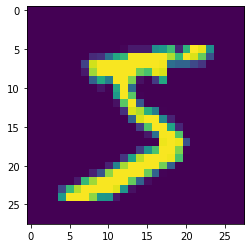

In [36]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [37]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [38]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [39]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [40]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [41]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(8, 3, 3, activation='relu')) # 24
model.add(Convolution2D(16, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, activation='relu')) # 11

model.add(Convolution2D(8, 3, 3, activation='relu')) # 9
model.add(Convolution2D(16, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 8)         584       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 8)         136       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 9, 9, 8)           584       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 16)         

In [44]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [45]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.2203 - accuracy: 0.9311
Epoch 2/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0884 - accuracy: 0.9736
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0670 - accuracy: 0.9793
Epoch 4/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0543 - accuracy: 0.9832
Epoch 5/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0469 - accuracy: 0.9855
Epoch 6/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0408 - accuracy: 0.9865
Epoch 7/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0359 - accuracy: 0.9887
Epoch 8/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0323 - accuracy: 0.9894
Epoch 9/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0282 - accuracy: 0.9912
Epoch 10/10
60000/60000 [============

In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [47]:
print(score)

[0.041827991014390865, 0.9871000051498413]


In [48]:
y_pred = model.predict(X_test)

In [49]:
print(y_pred[:9])
print(y_test[:9])

[[4.5204868e-10 3.4299109e-11 2.2723523e-08 2.3152410e-07 1.0441043e-11
  1.1464552e-11 5.7289876e-18 9.9999976e-01 2.7506453e-10 2.3128521e-08]
 [9.4426256e-10 4.8911071e-09 1.0000000e+00 1.4224643e-14 2.5108683e-13
  3.2192713e-15 2.3278766e-09 6.8186979e-18 8.6879073e-11 5.7113549e-19]
 [2.1140949e-09 9.9999321e-01 1.5472213e-07 1.5284321e-12 5.5329210e-06
  4.1623296e-09 2.1177280e-08 1.0439885e-06 4.3692310e-08 1.3023791e-07]
 [9.9939346e-01 3.4720614e-12 1.9494753e-06 1.2302439e-11 1.5091850e-07
  3.1095547e-07 5.6328817e-04 1.2930876e-10 4.8018953e-09 4.0838950e-05]
 [1.2794150e-09 1.9320424e-12 3.0559149e-09 2.7524917e-13 9.9999726e-01
  9.4940601e-12 4.2138857e-09 3.8695056e-09 1.1256308e-09 2.7241908e-06]
 [3.7573625e-10 9.9999571e-01 2.6824939e-08 3.1539597e-14 2.9310970e-06
  3.7560854e-11 2.4186093e-09 1.2576520e-06 1.0349750e-08 7.2446404e-08]
 [1.9581483e-17 3.3139383e-10 1.7231431e-09 1.6584258e-14 9.9999940e-01
  2.9181088e-11 4.2247048e-12 5.6581239e-08 3.9182422e-07 

In [50]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored